<a href="https://colab.research.google.com/github/Kecasta/wine_quality/blob/main/calidad_de_vinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importamos las librerias necesarias para el proyecto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
data = pd.read_csv('/content/WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
data= data.drop('Id', axis=1) # Eliminamos las columnas que no necesitamos
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.info() # vemos más a detalle el tipo de dataos que tenemos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [9]:
data.describe().T # vemos un resumen estadistico de nuestro conjunto de datos

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [10]:
data['quality'].unique() # vemos los valores unicos de la columna quality

array([5, 6, 7, 4, 8, 3])

Vamos a buscar variables que tengan corelacion entre ellas para ver que columnas tener en cuenta para el entrenamiento de nuestro modelo

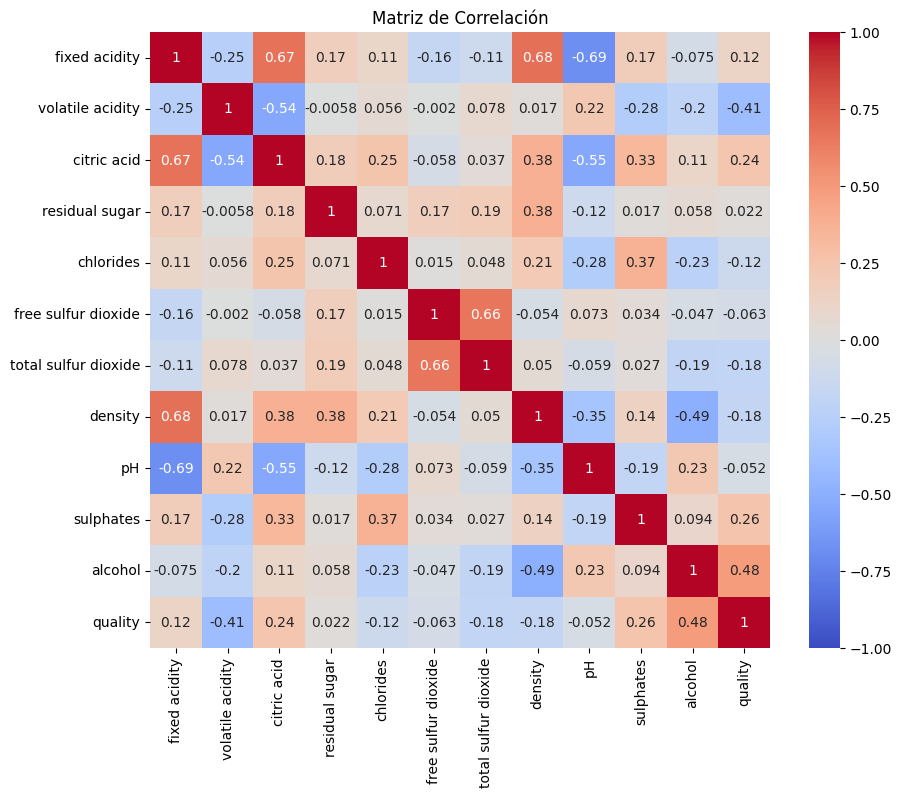

In [11]:
correlation_matrix = data.corr() # calculamos la matriz de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin = -1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [12]:
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print(quality_correlation)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


In [14]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

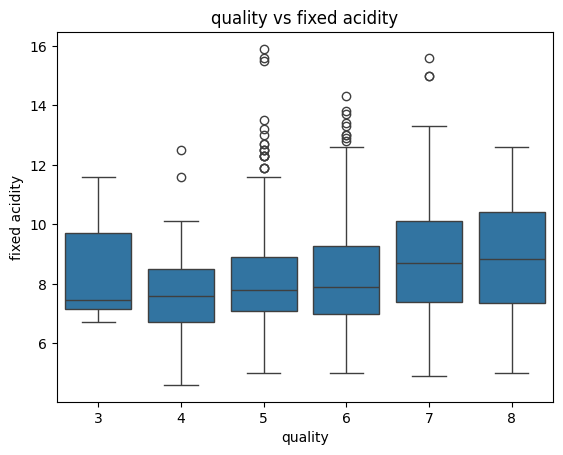

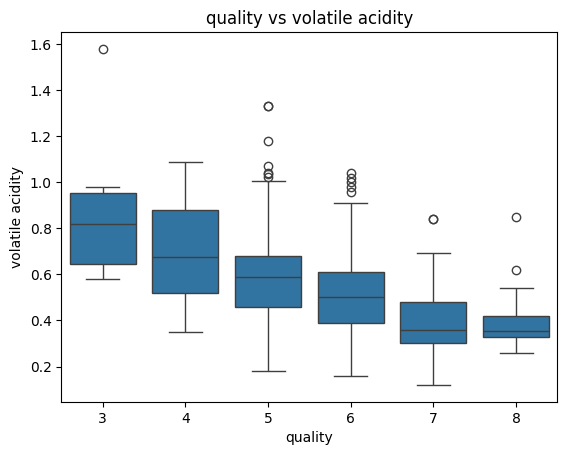

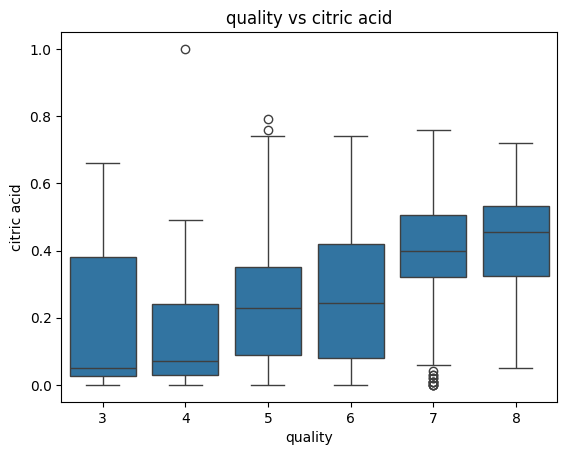

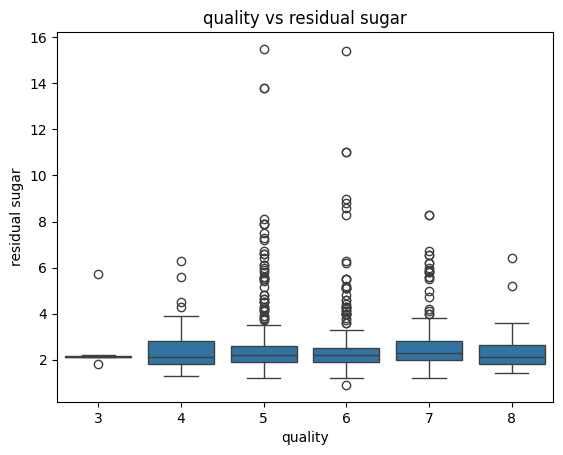

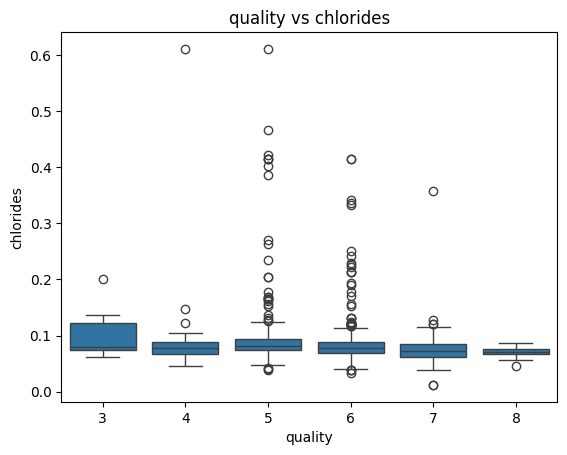

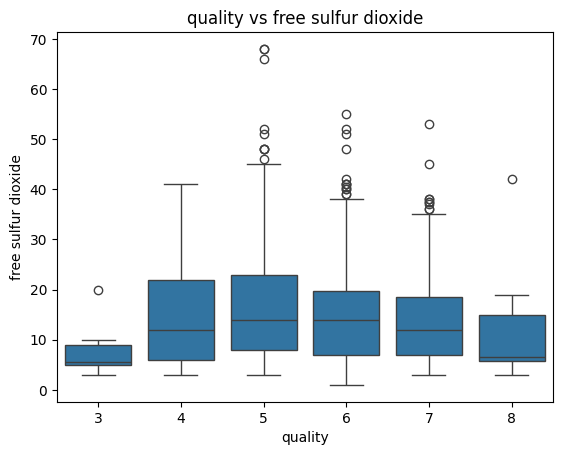

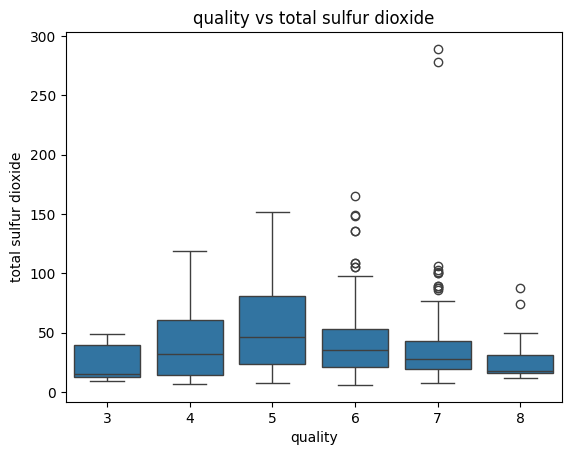

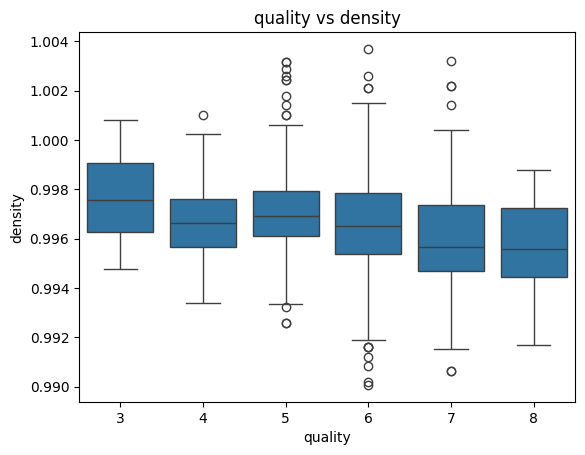

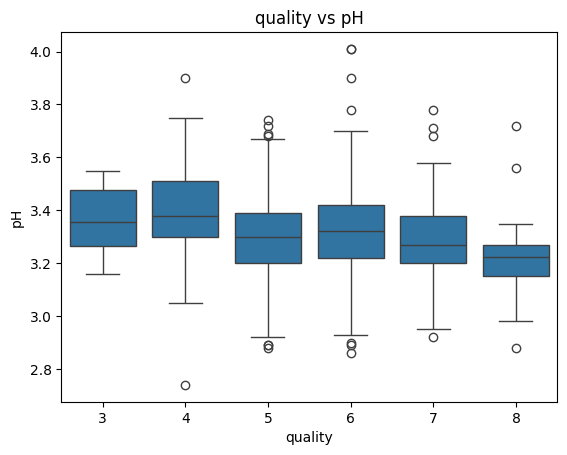

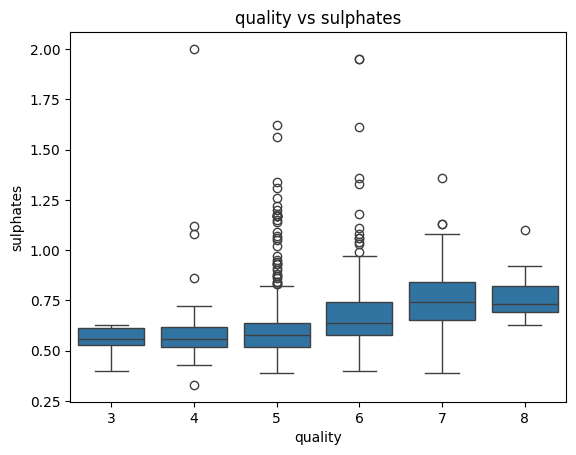

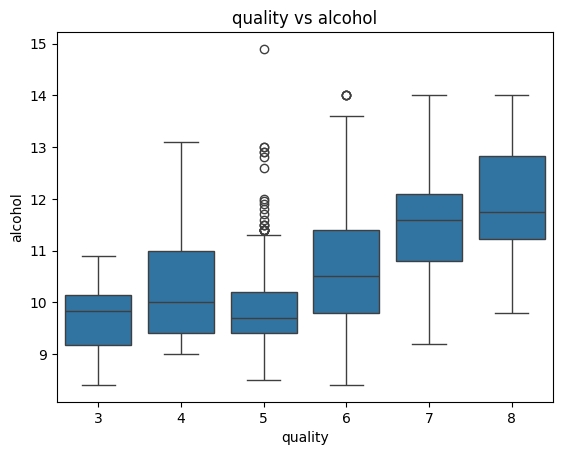

In [15]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for col in cols:
  sns.boxplot(data = data, x='quality', y = col)
  plt.title(f'quality vs {col}')
  plt.show()

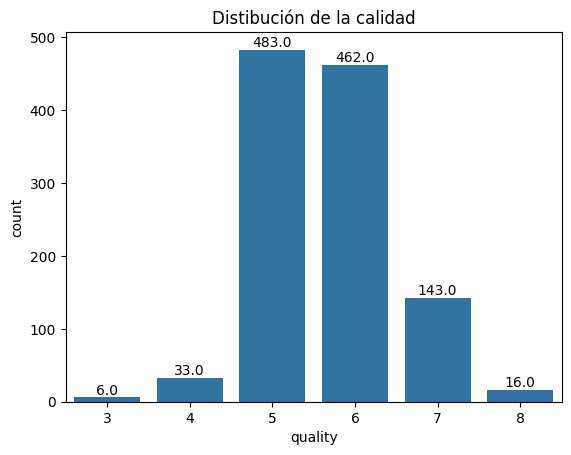

In [16]:
# Vamos a ver la cantidad de datos por calidades

ax = sns.countplot(x='quality', data=data)

for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', fontsize=10, color='black', xytext=(0,5),
              textcoords='offset points')

plt.title('Distibución de la calidad')
plt.show()

In [17]:
# Vamos a reducir la distancia entre valores minimos y maximos

data_log = data.copy()

for col in cols:
  data_log[col] = np.log1p(data_log[col])

In [18]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
data_log.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.128232,0.530628,0.000000,1.064711,0.073250,2.484907,3.555348,0.692047,1.506297,0.444686,2.341806,5
1,2.174752,0.631272,0.000000,1.280934,0.093490,3.258097,4.219508,0.691546,1.435085,0.518794,2.379546,5
2,2.174752,0.565314,0.039221,1.193922,0.088011,2.772589,4.007333,0.691646,1.449269,0.500775,2.379546,5
3,2.501436,0.246860,0.444686,1.064711,0.072321,2.890372,4.110874,0.692147,1.425515,0.457425,2.379546,6
4,2.128232,0.530628,0.000000,1.064711,0.073250,2.484907,3.555348,0.692047,1.506297,0.444686,2.341806,5


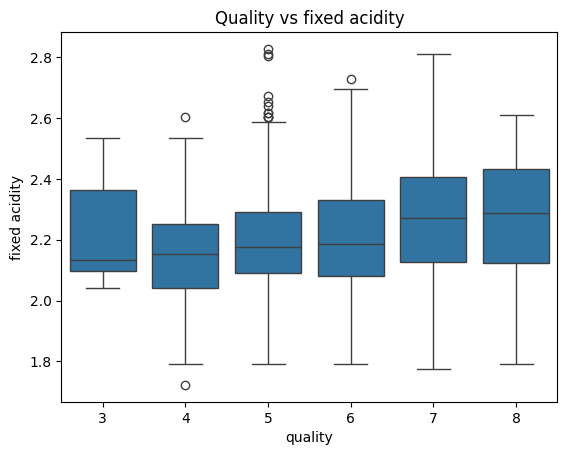

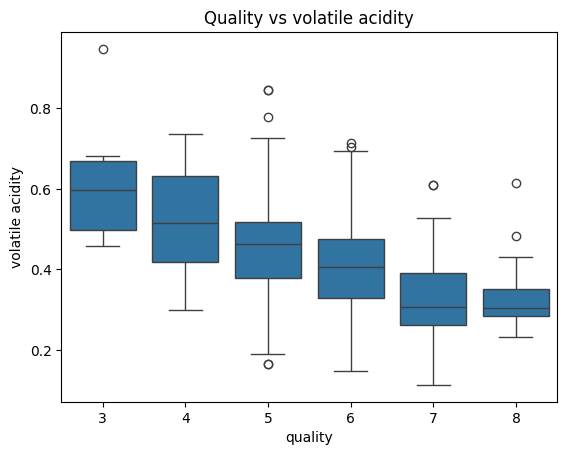

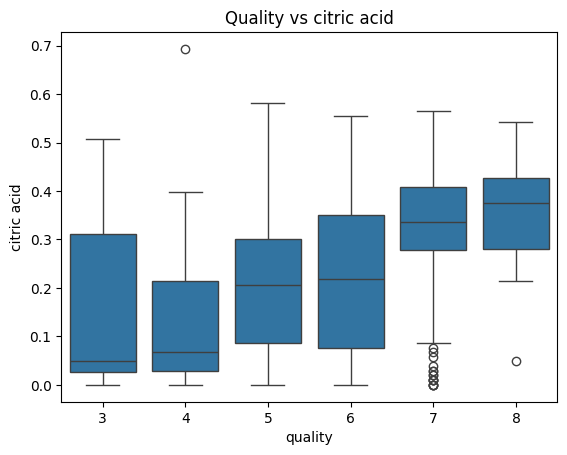

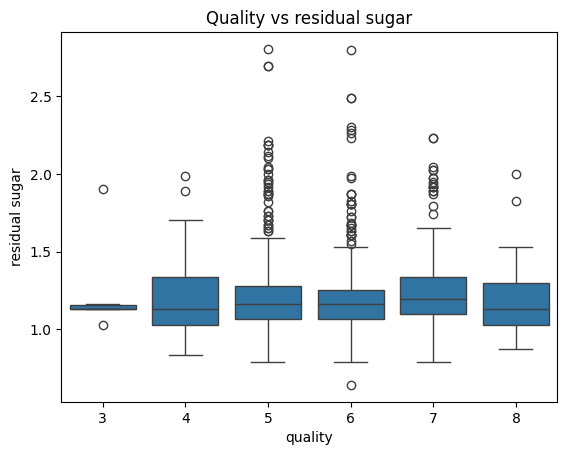

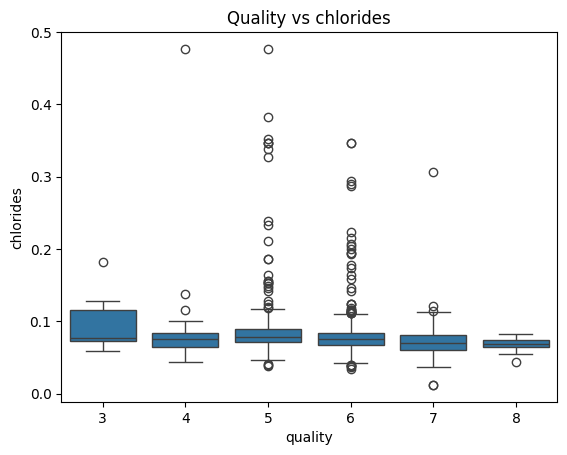

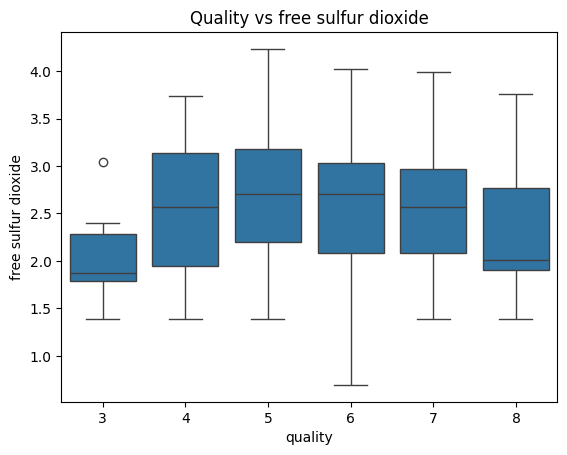

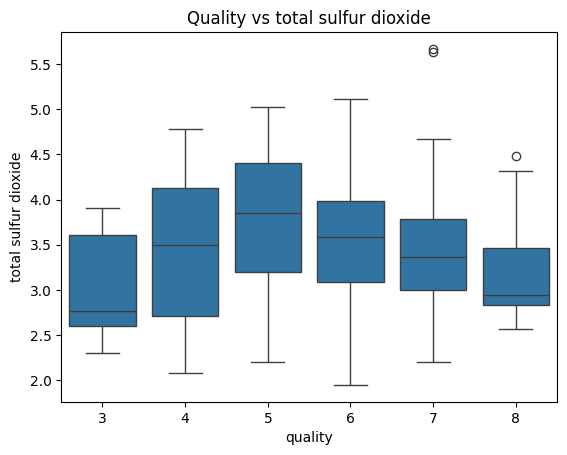

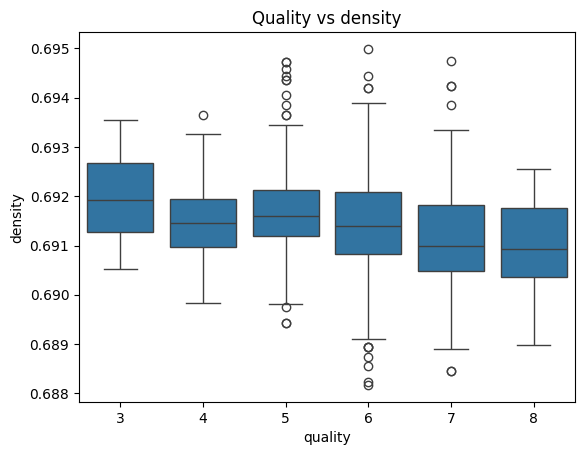

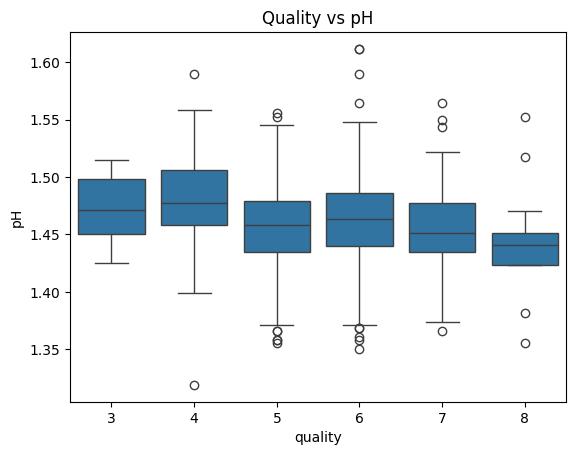

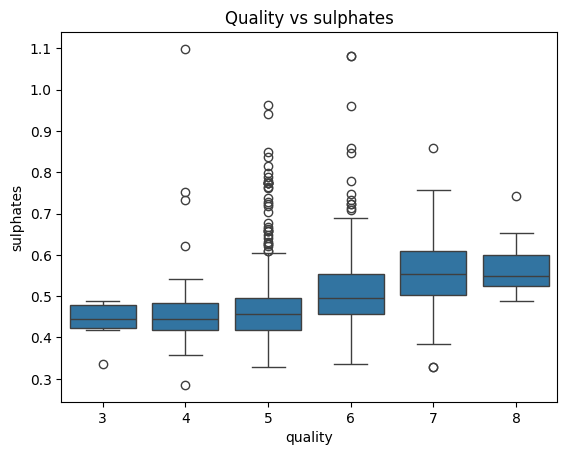

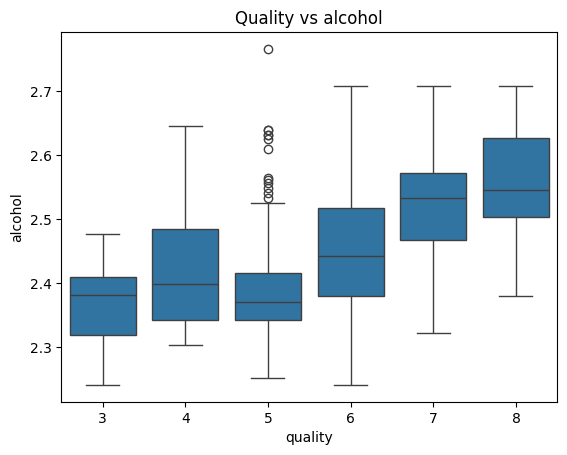

In [20]:

for col in cols:
  sns.boxplot(data=data_log, x='quality', y=col)
  plt.title(f'Quality vs {col}')
  plt.show()


In [21]:
# Entrenamos nuestro modelo

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts())
print(y_test.value_counts())

quality
5    387
6    363
7    117
4     27
8     14
3      6
Name: count, dtype: int64
quality
6    99
5    96
7    26
4     6
8     2
Name: count, dtype: int64


In [22]:
model_col = []

for col in cols:
  model_col.append(col)
  model = RandomForestClassifier(random_state=0)
  model.fit(X_train[model_col], y_train)
  y_pred = model.predict(X_test[model_col])
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Precisión con {model_col}: {accuracy}')

Precisión con ['fixed acidity']: 0.5021834061135371
Precisión con ['fixed acidity', 'volatile acidity']: 0.49344978165938863
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid']: 0.5502183406113537
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']: 0.5720524017467249
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']: 0.6026200873362445
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']: 0.5851528384279476
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']: 0.6026200873362445
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']: 0.6724890829694323
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar'

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(y_train.value_counts())
print(y_test.value_counts())


quality
5    386
6    370
7    114
4     26
8     13
3      5
Name: count, dtype: int64
quality
5    97
6    92
7    29
4     7
8     3
3     1
Name: count, dtype: int64


In [24]:
model_col = []

for col in cols:
  model_col.append(col)
  model = RandomForestClassifier(random_state=0)
  model.fit(X_train[model_col], y_train)
  y_pred = model.predict(X_test[model_col])
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Precisión con {model_col}: {accuracy}')


Precisión con ['fixed acidity']: 0.4585152838427948
Precisión con ['fixed acidity', 'volatile acidity']: 0.5633187772925764
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid']: 0.5589519650655022
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']: 0.5458515283842795
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']: 0.5851528384279476
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']: 0.5938864628820961
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']: 0.62882096069869
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']: 0.6462882096069869
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', '

In [25]:
X = data_log.drop('quality', axis=1)
y = data_log['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:

model_col = []

for col in cols:
  model_col.append(col)
  model = RandomForestClassifier(random_state=0)
  model.fit(X_train[model_col], y_train)
  y_pred = model.predict(X_test[model_col])
  accuracy = accuracy_score(y_test, y_pred)
  print(f'Precisión con {model_col}: {accuracy}')

Precisión con ['fixed acidity']: 0.4978165938864629
Precisión con ['fixed acidity', 'volatile acidity']: 0.4978165938864629
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid']: 0.5764192139737991
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']: 0.5414847161572053
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']: 0.5938864628820961
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']: 0.5807860262008734
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']: 0.5982532751091703
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']: 0.6812227074235808
Precisión con ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',